# Movie Analysis Project by Brooke Smyth, Garrett Williams, and Scott Schumann

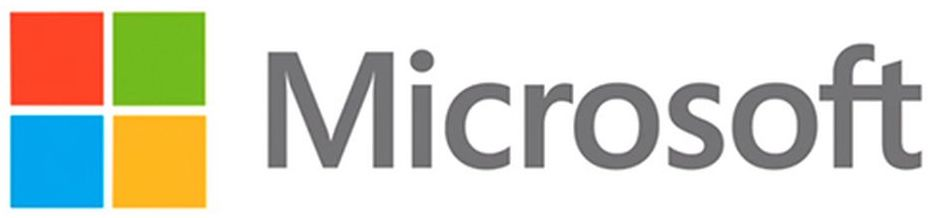

**Overview:** Microsoft has decided to create a new movie studio, and they have requested our help to determine what decisions they should make to be successful. Our job is to analyze relevant data to determine which films are doing well at the box office, and which factors related to these successful films Microsoft can focus on in order to establish their new movie studio. 

**Business Problem:** Given that there are a number of factors that could be potentially related to the success of movies, we decided that we wanted to focus on individual people who have expertise in the industry that could help Microsoft with a successful start to their studio. Given the manner in which movies are made, we decided to focus in particular on three important categories of people who work in film:

1) Directors\
2) Actors/Actresses\
3) Writers

Our three actionable insights in the notebook that follows include lists of the top directors, actors/actresses, and writers sorted by highest median ROI. 

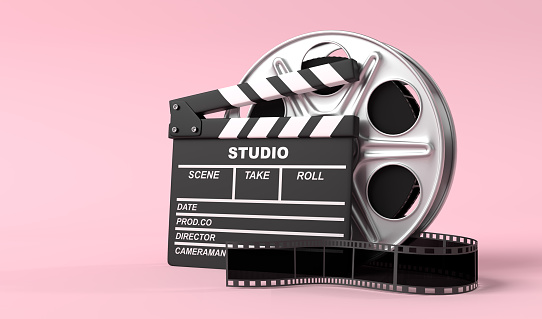

**Data Understanding:** For this project, we decided to use data collected from IMDB and The Numbers (TN). We were specifically interested in data relating to individual people (directors, actors/actresses, writers) which we found on IMDB, as well as data relating to the financial success of each film which we found on TN. We thus decided to use data from these two sources, and merged the data frames to isolate the variables described below.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Preparation:** Our main process was to analyze the data of people who work in these roles, honing in specifically on the return on investment (ROI) of projects they have worked on since 2015. We decided that ROI would be the most important measure for a new studio, given that they would want to ensure that they make a profit on their projects as they get started in the industry. We further isolated our data set to include only films made since 2015, given that we wanted to find people who have had recent success in the industry. The other factor that we included in each category below was to isolate individuals who have worked on more than two projects since 2015, given that we wanted to focus on people who are both currently active in the field as well as successful in their respective fields.

In [2]:
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
# Merging dataframes
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#create a new column that has the year as an integer
tn['year_int'] = tn['release_date'].str[-4:].astype(int)

#get info from movies since 2010 because that's as far back as the imdb data goes
tn = tn[tn['year_int'] >= 2015]

#convert the values in the worldwide gross column to integers
tn["ww_gross_int"] = tn["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)

#convert the values in the production budget column to integers
tn["pro_budget_int"] = tn["production_budget"].replace("[\$,]", "", regex=True).astype(int)

#create a new column that calculates return on investment 
tn["roi"] = (tn["ww_gross_int"] - tn["pro_budget_int"])/tn["pro_budget_int"]

#sort the movies by return on investment
tn.sort_values(by = "roi", ascending = False, inplace = True)
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740
5213,14,"Apr 17, 2015",Unfriended,"$1,000,000","$32,789,645","$64,364,198",2015,64364198,1000000,63.364198
4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,278964806,5000000,54.792961
4248,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590
5063,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008
...,...,...,...,...,...,...,...,...,...,...
4995,96,"Mar 20, 2015",The Walking Deceased,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4997,98,"Aug 21, 2015",The Curse of Downers Grove,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4998,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4999,100,"Jul 8, 2016",The Dog Lover,"$2,000,000",$0,$0,2016,0,2000000,-1.000000


In [5]:
imdb_title_rb = pd.merge(imdb_title, imdb_ratings, on = "tconst", how = "left")

In [6]:
imdb_title_crb = pd.merge(imdb_title_rb, imdb_crew, on = "tconst", how = "left")
imdb_title_crb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0765384,nm0749914","nm1360635,nm0749914"


In [7]:
#imdb_merged = pd.merge(imdb_title_crb, imdb_name, left_on = "directors", right_on = "nconst", how = "left")
#imdb_merged.head()

In [7]:
#Merging the TN and IMDB dataframes, which only includes data from 2010 to the present. We feel this is 
#relevant because the stakeholder is trying to start a new studio and thus more recent data is probably
#more useful.
tn_imdb_merged = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
tn_imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 653 non-null    int64  
 1   release_date       653 non-null    object 
 2   movie              653 non-null    object 
 3   production_budget  653 non-null    object 
 4   domestic_gross     653 non-null    object 
 5   worldwide_gross    653 non-null    object 
 6   year_int           653 non-null    int64  
 7   ww_gross_int       653 non-null    int64  
 8   pro_budget_int     653 non-null    int64  
 9   roi                653 non-null    float64
 10  tconst             653 non-null    object 
 11  primary_title      653 non-null    object 
 12  original_title     653 non-null    object 
 13  start_year         653 non-null    int64  
 14  runtime_minutes    637 non-null    float64
 15  genres             649 non-null    object 
 16  averagerating      622 non

# Data Modeling

## Getting Top Directors by Highest Median ROI

The first category in our data set that we want to analyze are the top directors by highest median ROI.

In [8]:
# Just choosing the columns that will be most useful in order to simplify
imdb_directors_name_roi = tn_imdb_merged[['movie', 'year_int','roi','directors']]
imdb_directors_name_roi

,movie,year_int,roi,directors
0,The Gallows,2015,415.564740,"nm4000389,nm3951039"
1,Get Out,2017,50.073590,nm1443502
2,Moonlight,2016,42.497008,nm1503575
3,Dangal,2016,30.016276,nm4318159
4,Lights Out,2016,28.761302,nm2497546
...,...,...,...,...
648,The Timber,2015,-1.000000,nm2557193
649,The Walking Deceased,2015,-1.000000,nm3438843
650,The Curse of Downers Grove,2015,-1.000000,nm0553796
651,Wind Walkers,2015,-1.000000,nm0295031


In [9]:
#explode the directors column so that multiple directors can be assigned to the same movie
imdb_directors_name_roi = imdb_directors_name_roi.assign(directors=imdb_directors_name_roi['directors'].str.split(",")).explode('directors')
imdb_directors_name_roi

,movie,year_int,roi,directors
0,The Gallows,2015,415.564740,nm4000389
0,The Gallows,2015,415.564740,nm3951039
1,Get Out,2017,50.073590,nm1443502
2,Moonlight,2016,42.497008,nm1503575
3,Dangal,2016,30.016276,nm4318159
...,...,...,...,...
648,The Timber,2015,-1.000000,nm2557193
649,The Walking Deceased,2015,-1.000000,nm3438843
650,The Curse of Downers Grove,2015,-1.000000,nm0553796
651,Wind Walkers,2015,-1.000000,nm0295031


In [10]:
#now merge the name dataframe with the directors
imdb_directors_name_roi = pd.merge(imdb_directors_name_roi, imdb_name, left_on = 'directors', right_on = 'nconst', how = 'left')
imdb_directors_name_roi.head()

,movie,year_int,roi,directors,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,The Gallows,2015,415.564740,nm4000389,nm4000389,Travis Cluff,NaN,NaN,"producer,actor,director","tt8676446,tt7473716,tt2309260,tt2181752"
1,The Gallows,2015,415.564740,nm3951039,nm3951039,Chris Lofing,NaN,NaN,"producer,director,writer","tt7473716,tt2181752,tt2309260,tt8676446"
2,Get Out,2017,50.073590,nm1443502,nm1443502,Jordan Peele,1979.0,NaN,"actor,writer,producer","tt6857112,tt4139124,tt7349662,tt5052448"
3,Moonlight,2016,42.497008,nm1503575,nm1503575,Barry Jenkins,1979.0,NaN,"writer,director,producer","tt7125860,tt1133989,tt4975722,tt0385108"
4,Dangal,2016,30.016276,nm4318159,nm4318159,Nitesh Tiwari,NaN,NaN,"writer,director,music_department","tt6967980,tt1841542,tt3531852,tt5074352"


In [11]:
# get stats for roi grouped by name of director, sort by median, exclude directors who have made less than 3 movies 
stat_imdb_directors_name_roi = imdb_directors_name_roi.groupby(['primary_name'])['roi'].describe()
stat_dir_med = stat_imdb_directors_name_roi.sort_values(by=['50%'], ascending=False)
stat_dir_med = stat_dir_med[stat_dir_med['count'] >= 3]
stat_dir_med

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
David F. Sandberg,3.0,17.129901,12.891307,3.269409,11.314200,19.358991,24.060147,28.761302
Christopher Landon,3.0,10.056699,12.455483,0.036990,3.084023,6.131055,15.066553,24.002052
F. Gary Gray,3.0,3.062796,3.675571,-0.971818,1.483783,3.939385,5.080103,6.220821
Steven Spielberg,4.0,2.236355,1.221968,0.426048,2.052745,2.728456,2.912065,3.062458
Jon M. Chu,3.0,3.019500,3.745275,-0.526213,1.060922,2.648056,4.792356,6.936657
Brad Peyton,3.0,2.196383,1.181273,0.874207,1.720671,2.567136,2.857470,3.147805
Malcolm D. Lee,3.0,2.767964,1.170755,1.720210,2.136119,2.552027,3.291841,4.031655
Clint Eastwood,3.0,2.087479,1.090795,0.869873,1.643513,2.417154,2.696281,2.975409
David Yates,3.0,2.219080,1.260250,0.938345,1.599723,2.261100,2.859447,3.457794


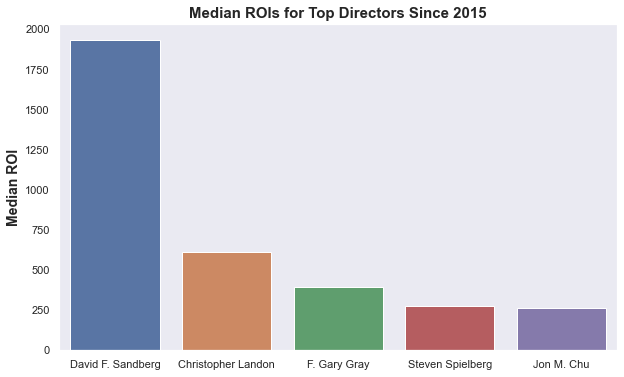

In [12]:
# Graph for Median ROIs for the Top Five Directors Since 2015 (we multiplied the roi ratio 
# in the dataframes by 100 to make it a percent for this graph and the commentary at end of Director Section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=stat_dir_med.index[:5], y=stat_dir_med['50%'][:5]*100)
plt.ylabel('Median ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Median ROIs for Top Directors Since 2015", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Director_Median_ROIs.png");

In [13]:
# smaller dfs for graphs below
david = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'David F. Sandberg']
chris = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Christopher Landon']
gary = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'F. Gary Gray']
steven = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Steven Spielberg']
jon = imdb_directors_name_roi[imdb_directors_name_roi['primary_name'] == 'Jon M. Chu']

In [14]:
# resetting index of the smaller dataframe created in the cell above this one
david.reset_index(inplace=True)
chris.reset_index(inplace=True)
gary.reset_index(inplace=True)
steven.reset_index(inplace=True)
jon.reset_index(inplace=True)



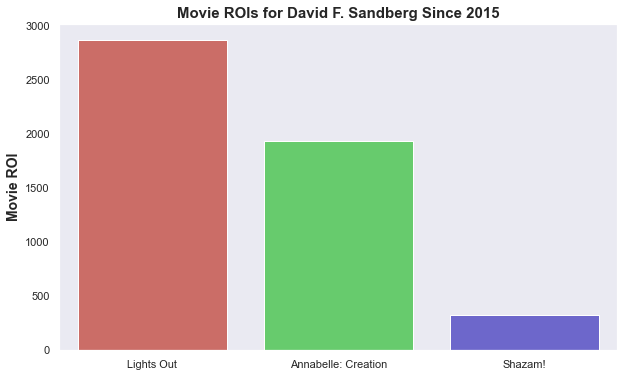

In [15]:
# David Sandberg Movie ROIs (we multiplied the roi ratio in the dataframes by 100 to make it a percent 
# for this graph and the commentary at end of Director section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=david['movie'], y=david['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for David F. Sandberg Since 2015", fontweight= "bold", fontsize=15);
plt.grid(False)
sns_plot.figure.savefig("David_Sandberg_ROIs.png");

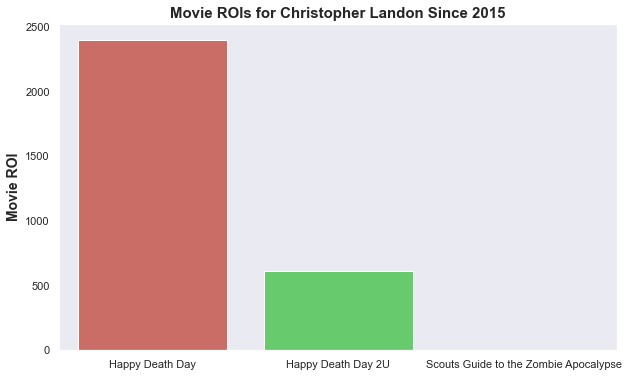

In [16]:
# Christopher Landon Movie ROIs (we multiplied the roi ratio in the dataframes by 100 to make it a 
# percent for this graph and the commentary at end of Director section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=chris['movie'], y=chris['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Christopher Landon Since 2015", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Christopher_Landon_ROIs.png");

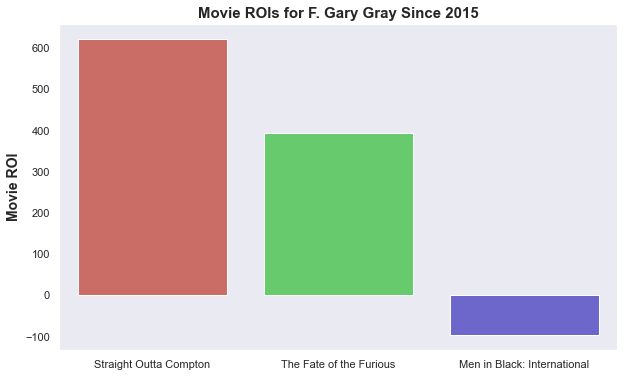

In [17]:
# F. Gary Gray Movie ROIs (we multiplied the roi ratio in the dataframes by 100 to make it a 
# percent for this graph and the commentary at end of Director section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=gary['movie'], y=gary['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for F. Gary Gray Since 2015",fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Gary_Gray_ROIs.png");

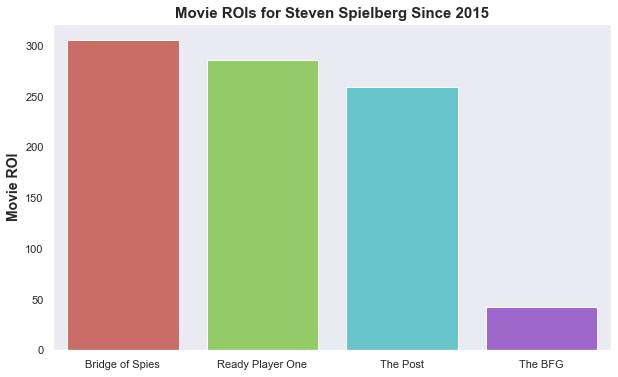

In [18]:
# Movie ROIs for Speilberg (we multiplied the roi ratio in the dataframes by 100 to make it a 
# percent for this graph and the commentary at end of Director section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=steven['movie'], y=steven['roi']*100, palette='hls')
plt.ylabel('Movie ROI', fontweight= "bold",fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Steven Spielberg Since 2015", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Steven_Spielberg_ROIs.png");

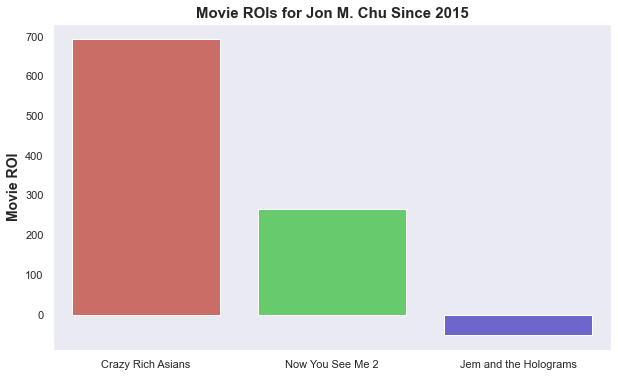

In [19]:
# Movie ROIs for Chu (we multiplied the roi ratio in the dataframes by 100 to make it a percent for this graph and 
# the commentary at end of Director section)
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns_plot = sns.barplot(x=jon['movie'], y=jon['roi']*100, palette='hls')
plt.ylabel('Movie ROI',fontweight= "bold", fontsize=14)
plt.xlabel("")
plt.title("Movie ROIs for Jon M. Chu Since 2015", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Jon_Chu_ROIs.png");

<b> Top Five Director Recommendations </b>
1. <b> David F. Sandberg </b> has directed three movies since 2015, all three of which have yielded high ROIs ('Lights Out': 2876, 'Anabelle: Creation': 1936, "Shazam!": 327), of which the ROI for 'Lights Out' is the highest in our filtered data set.


2. <b> Christopher Landon </b> has directed three movies since 2015, with two of the three movies yielding high ROIs ('Happy Death Day': 2400, 'Happy Death Day 2U': 613, 'Scouts Guide to the Zombie Apocalypse: 3.7), compared to the highest ROI in our filtered data set.


3. <b> F. Gary Gray </b> has directed three movies since 2015, two of the three of which resulted in high ROIs ('Straight Outta Compton': 622, 'The Fate of the Furious': 394, 'Men in Black: International': -97), compared to the highest ROI in our filtered data set.


4. <b> Steven Spielberg </b> has directed four movies since 2015, three of the four of which had relatively good ROIs ('Bridge of Spies': 306, "Ready Player One': 286, 'The Post': 259, 'The BFG': 43), compared to the highest ROI in our filtered data set.


5. <b> Jon M. Chu </b> has directed three movies since 2015, two of three of which had good ROIs ('Crazy Rich Asians': 694, 'Now You See Me 2': 265, 'Jem and the Holograms': -53), compared to the highest ROI in our filtered data set.

## Getting Top Actors/Actresses by Highest Median ROI

Next on our list after analyzing top directors is to analyze the top actors/actresses by highest median ROI.

In [21]:
imdb_actors = imdb_principals[(imdb_principals["category"] == "actor")\
                              | (imdb_principals["category"] == "actress")]

In [22]:
imdb_actors_name = pd.merge(imdb_actors, imdb_name, how = 'left', on = 'nconst')
imdb_actors_name.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
2,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822"
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358"
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383"


In [23]:
imdb_actors_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402926 entries, 0 to 402925
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tconst              402926 non-null  object 
 1   ordering            402926 non-null  int64  
 2   nconst              402926 non-null  object 
 3   category            402926 non-null  object 
 4   job                 0 non-null       object 
 5   characters          325018 non-null  object 
 6   primary_name        402685 non-null  object 
 7   birth_year          127735 non-null  float64
 8   death_year          3568 non-null    float64
 9   primary_profession  384693 non-null  object 
 10  known_for_titles    389933 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 36.9+ MB


In [24]:
imdb_actors_name_roi = pd.merge(imdb_actors_name, tn_imdb_merged, how = 'left', on = 'tconst')
imdb_actors_name_roi = imdb_actors_name_roi.dropna(subset=['movie'])
imdb_actors_name_roi = imdb_actors_name_roi[imdb_actors_name_roi['death_year'].isnull()]
imdb_actors_name_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574 entries, 15 to 397958
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              2574 non-null   object 
 1   ordering            2574 non-null   int64  
 2   nconst              2574 non-null   object 
 3   category            2574 non-null   object 
 4   job                 0 non-null      object 
 5   characters          2551 non-null   object 
 6   primary_name        2574 non-null   object 
 7   birth_year          2118 non-null   float64
 8   death_year          0 non-null      float64
 9   primary_profession  2558 non-null   object 
 10  known_for_titles    2568 non-null   object 
 11  id                  2574 non-null   float64
 12  release_date        2574 non-null   object 
 13  movie               2574 non-null   object 
 14  production_budget   2574 non-null   object 
 15  domestic_gross      2574 non-null   object 
 16  wor

In [25]:
df_actors_name_roi_simplified = imdb_actors_name_roi[['tconst', 'nconst', 'category', 'primary_name','movie', 'roi', 'year_int']]
df_actors_name_roi_simplified.head()

,tconst,nconst,category,primary_name,movie,roi,year_int
15,tt0475290,nm0000982,actor,Josh Brolin,"Hail, Caesar!",1.916395,2016.0
16,tt0475290,nm0000123,actor,George Clooney,"Hail, Caesar!",1.916395,2016.0
17,tt0475290,nm2403277,actor,Alden Ehrenreich,"Hail, Caesar!",1.916395,2016.0
18,tt0475290,nm0000146,actor,Ralph Fiennes,"Hail, Caesar!",1.916395,2016.0
314,tt1124037,nm0000190,actor,Matthew McConaughey,Free State of Jones,-0.535255,2016.0


In [26]:
df_actor_only = df_actors_name_roi_simplified[df_actors_name_roi_simplified['category']=="actor"]
df_actress_only = df_actors_name_roi_simplified[df_actors_name_roi_simplified['category']=="actress"]

In [27]:
df_actor_stats = df_actor_only.groupby(by = ['primary_name'])['roi'].describe()
df_actor_stats.sort_values(by = 'count', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Kevin Hart,9.0,3.939219,3.685161,0.416894,2.120683,2.485722,3.343896,10.823340
Dwayne Johnson,9.0,4.035803,2.652220,1.432924,2.567136,3.250116,3.939385,9.716624
Chris Hemsworth,7.0,1.716342,2.585998,-0.971818,-0.411069,1.031954,3.474643,5.827114
Johnny Depp,7.0,0.739543,1.277157,-0.995408,-0.004939,0.628989,1.562983,2.427135
Joel Edgerton,7.0,2.082806,4.048783,-1.000000,-0.070101,0.864866,2.029642,10.795695


In [28]:
df_actress_stats = df_actress_only.groupby(by = ['primary_name'])['roi'].describe()
df_actress_stats.sort_values(by = 'count', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Anna Kendrick,7.0,3.104044,2.877455,-0.075920,1.526572,2.824052,3.504456,8.918120
Nicole Kidman,6.0,1.491186,4.921977,-1.000000,-0.885665,-0.581810,0.329643,11.464227
Kristen Wiig,6.0,4.139019,5.069649,-0.199074,0.252569,2.828833,6.096211,12.796370
Jennifer Lawrence,6.0,1.346745,1.244772,-0.572108,0.792987,1.431439,1.972881,3.056167
Margot Robbie,5.0,1.866639,1.711005,-0.275693,0.869389,1.585626,3.263199,3.890674


In [29]:
df_actor_stats[df_actor_stats['count'] > 2].sort_values(by = '50%', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Dev Patel,3.0,6.881852,5.256967,1.142899,4.590665,8.038431,9.751329,11.464227
Mahershala Ali,4.0,14.083424,19.864775,-0.535255,0.894022,7.185972,20.375375,42.497008
Jamie Dornan,3.0,8.320433,4.291712,5.751829,5.843174,5.934518,9.604735,13.274953
Willem Dafoe,3.0,5.368419,0.763281,4.647662,4.968583,5.289504,5.728798,6.168092
Martin Henderson,3.0,4.024469,1.411697,2.404570,3.540698,4.676826,4.834418,4.992010


In [30]:
df_actress_stats[df_actress_stats['count'] > 2].sort_values(by = '50%', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Octavia Spencer,3.0,7.197362,2.555082,4.280665,6.275767,8.270869,8.655711,9.040554
Rooney Mara,4.0,10.200757,12.040232,0.010173,1.975648,7.047517,15.272625,26.697820
Bryce Dallas Howard,3.0,4.999977,2.901325,1.649823,4.159457,6.669092,6.675054,6.681016
Jessica Rothe,3.0,11.270661,11.093671,3.678876,4.904965,6.131055,15.066553,24.002052
Eloise Mumford,3.0,8.320433,4.291712,5.751829,5.843174,5.934518,9.604735,13.274953


In [31]:
df_actor_stats['count'].mean()

1.5365384615384616

In [32]:
df_actress_stats['count'].mean()

1.4416543574593796

In [33]:
top_actors = list(df_actor_stats[df_actor_stats['count'] > 2].sort_values(by = '50%', ascending = False).head(4).index)
roi_for_top_actors = df_actor_stats[df_actor_stats['count'] > 2].sort_values(by = '50%', ascending = False).head(4)
roi_for_top_actors = list(roi_for_top_actors['50%'].values*100)
color_m = ['blue']*4
gender_m = ['actor']*4

In [34]:
top_actresses = list(df_actress_stats[df_actress_stats['count'] > 2].\
                     sort_values(by = '50%', ascending = False).head(4).index)
roi_for_top_actresses = df_actress_stats[df_actress_stats['count'] > 2].\
                    sort_values(by = '50%', ascending = False).head(4)
roi_for_top_actresses = list(roi_for_top_actresses['50%'].values*100)
color_f = ['red']*4
gender_f = ['actress']*4

In [35]:
data = {"Actors":top_actors + top_actresses,"Percentage Return on Investment":roi_for_top_actors + roi_for_top_actresses, \
        "Color": color_m + color_f, "Gender": gender_m + gender_f}
final_actors_df = pd.DataFrame(data).sort_values(by = 'Percentage Return on Investment', ascending = False)
final_actors_df

,Actors,Percentage Return on Investment,Color,Gender
4,Octavia Spencer,827.086864,red,actress
0,Dev Patel,803.843060,blue,actor
1,Mahershala Ali,718.597231,blue,actor
5,Rooney Mara,704.751677,red,actress
6,Bryce Dallas Howard,666.909239,red,actress
7,Jessica Rothe,613.105500,red,actress
2,Jamie Dornan,593.451804,blue,actor
3,Willem Dafoe,528.950418,blue,actor


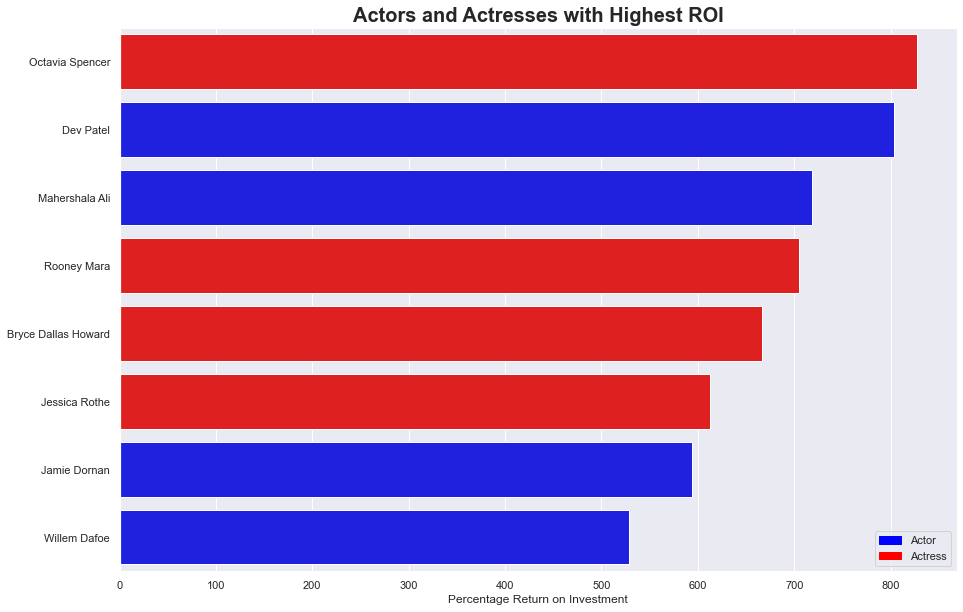

In [36]:
import matplotlib.patches as mpatches

plt.figure(figsize = (15,10))
sns.set_theme(style='darkgrid')
ax = sns.barplot(y = final_actors_df['Actors'], x = final_actors_df["Percentage Return on Investment"],\
                 palette = final_actors_df['Color'])
ax.set(ylabel = None);
ax.set_title("Actors and Actresses with Highest ROI",  size = 20, fontweight = 'bold')
#ax.set_xlabel(size = 15, fontweight = 'bold')

blue_patch = mpatches.Patch(color='blue', label='Actor')
red_patch = mpatches.Patch(color='red', label='Actress')
ax.legend(handles = [blue_patch, red_patch], loc = 'lower right')

ax.figure.savefig("Actors.png");

## Getting Top Writers by Highest Median ROI

Now that we have explored the top directors and actors by highest median ROI, the final recommendation that we want to make for Microsoft movie studios is for the top writers by highest median ROI.

In [37]:
#first, merge the money dataframe with only the crew data frame
imdb_writers_roi = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
#only focus on a couple columns that I need
imdb_writers_roi = imdb_writers_roi[['movie', 'roi', 'writers', 'year_int']]
#explode the writers column so that multiple writer can be assigned to the same movie
imdb_writers_roi = imdb_writers_roi.assign(writers=imdb_writers_roi['writers'].str.split(",")).explode('writers')
imdb_writers_roi.head()

,movie,roi,writers,year_int
0,The Gallows,415.564740,nm3951039,2015
0,The Gallows,415.564740,nm4000389,2015
1,Get Out,50.073590,nm1443502,2017
2,Moonlight,42.497008,nm1503575,2016
2,Moonlight,42.497008,nm4144120,2016


In [38]:
#now merge the name dataframe with the writers
imdb_writers_name_roi = pd.merge(imdb_writers_roi, imdb_name, left_on = 'writers', right_on = 'nconst', how = 'left')
#again only take the necessary columns
imdb_writers_name_roi = imdb_writers_name_roi[['movie', 'roi', 'writers', 'nconst', 'primary_name', 'year_int', 'death_year']]
imdb_writers_name_roi.head()

,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,415.564740,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,415.564740,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,50.073590,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,42.497008,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,42.497008,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN


In [39]:
#filtering df to include desired columns and remove people who are dead
imdb_writers_name_roi = imdb_writers_name_roi[imdb_writers_name_roi['death_year'].isna()]
imdb_writers_name_roi.head()

,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,415.564740,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,415.564740,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,50.073590,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,42.497008,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,42.497008,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN


In [40]:
#changing ROI column to percentage value
imdb_writers_name_roi['roi'] = imdb_writers_name_roi['roi']*100
imdb_writers_name_roi.head()

,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,41556.47400,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,41556.47400,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,5007.35902,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,4249.70080,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,4249.70080,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN


In [41]:
#looking at ROI statistics for writers by name
df_writer_stats = imdb_writers_name_roi.groupby(by = ['primary_name'])['roi'].describe()
df_writer_stats.sort_values(by = '50%', ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Travis Cluff,1.0,41556.474000,NaN,41556.474000,41556.474000,41556.474000,41556.474000,41556.474000
Chris Lofing,1.0,41556.474000,NaN,41556.474000,41556.474000,41556.474000,41556.474000,41556.474000
Tarell Alvin McCraney,1.0,4249.700800,NaN,4249.700800,4249.700800,4249.700800,4249.700800,4249.700800
Nitesh Tiwari,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Shreyas Jain,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Piyush Gupta,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Nikhil Mehrotra,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Rajshri Sudhakar,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
David F. Sandberg,1.0,2876.130200,NaN,2876.130200,2876.130200,2876.130200,2876.130200,2876.130200


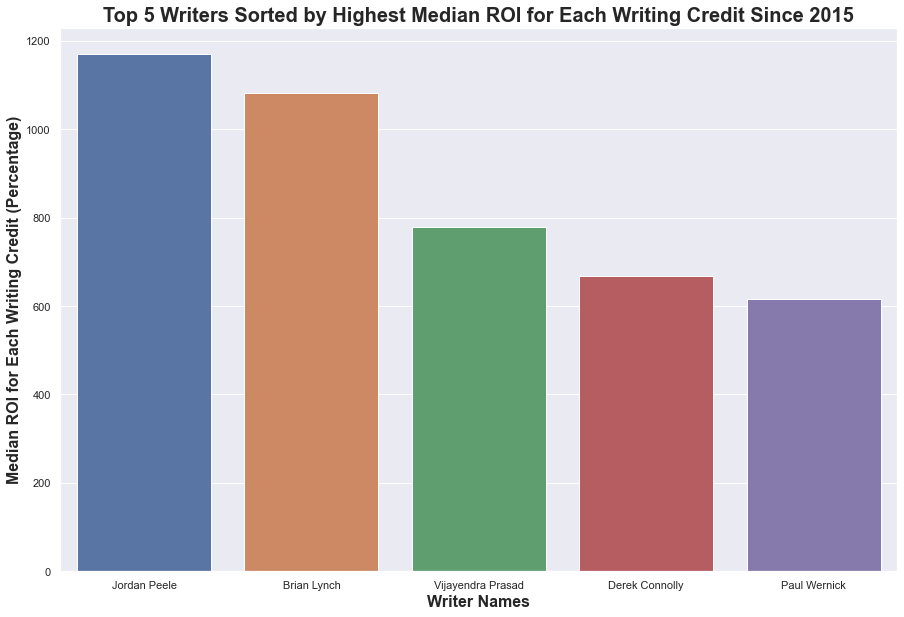

In [42]:
#visualizing top 5 writers list sorted by median ROI:
#sorting for writers that have worked on more than two films since 2015:
writer_list_median = df_writer_stats[df_writer_stats['count'] > 2].sort_values(by = '50%', ascending = False).head(5)
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = writer_list_median.index, y = '50%', data=writer_list_median)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Writer Names", size = 16, fontweight = 'bold')
ax.set_ylabel("Median ROI for Each Writing Credit (Percentage)", size = 16, fontweight = 'bold')
ax.set_title("Top 5 Writers Sorted by Highest Median ROI for Each Writing Credit Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("writers_median.png");

Given the above bar chart, we next wanted to examine each writer individually to see which films they worked on since 2015 and what the ROI was for each:

In [43]:
#making a dataframe for Jordan Peele
jordan_peele = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Jordan Peele']
jordan_peele = jordan_peele[['primary_name', 'movie', 'year_int', 'roi']]
jordan_peele

,primary_name,movie,year_int,roi
2,Jordan Peele,Get Out,2017,5007.35902
63,Jordan Peele,Us,2019,1171.05155
1159,Jordan Peele,Keanu,2016,37.92094


In [44]:
#making a dataframe for Brian Lynch
brian_lynch = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Brian Lynch']
brian_lynch = brian_lynch[['primary_name', 'movie', 'year_int', 'roi']]
brian_lynch

,primary_name,movie,year_int,roi
47,Brian Lynch,Minions,2015,1468.021855
77,Brian Lynch,The Secret Life of Pets,2016,1082.334045
1143,Brian Lynch,The Secret Life of Pets 2,2019,41.689370


In [45]:
#making a dataframe for Vijayendra Prasad
vijayendra_prasad = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Vijayendra Prasad']
vijayendra_prasad = vijayendra_prasad[['primary_name', 'movie', 'year_int', 'roi']]
vijayendra_prasad

,primary_name,movie,year_int,roi
106,Vijayendra Prasad,Bajrangi Bhaijaan,2015,836.756515
127,Vijayendra Prasad,Baahubali 2: The Conclusion,2017,778.343047
1377,Vijayendra Prasad,Baahubali: The Beginning,2015,-33.158338


In [46]:
#making a dataframe for Derek Connolly
derek_connolly = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Derek Connolly']
derek_connolly = derek_connolly[['primary_name', 'movie', 'year_int', 'roi']]
derek_connolly

,primary_name,movie,year_int,roi
159,Derek Connolly,Jurassic World: Fallen Kingdom,2018,668.101646
167,Derek Connolly,Jurassic World,2015,666.909239
686,Derek Connolly,Kong: Skull Island,2017,203.282194


In [47]:
#making a dataframe for Paul Wernick
paul_wernick = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Paul Wernick']
paul_wernick = paul_wernick[['primary_name', 'movie', 'year_int', 'roi']]
paul_wernick

,primary_name,movie,year_int,roi
58,Paul Wernick,Deadpool,2016,1281.078609
191,Paul Wernick,Deadpool 2,2018,615.164143
1061,Paul Wernick,Life,2017,74.016666


1) **Jordan Peele** has had a lot of success, in particular with his 2017 film *Get Out* which also had the maximum ROI in our data set (5007%). Peele's film *Us* also had a rather high ROI of 1171%.

2) **Brian Lynch** has been successful in the animation genre, producing movies such as *Minions* and *The Secret Life of Pets 1*, both of which have ROIs of 1468% and 1082%, respectively.

3) **Vijayendra Prasad** has worked primarily in India, which could provide an opportunity for Microsoft movie studios to gain traction with international audiences. Prasad worked on films such as *Bajrangi Bhaijaan* and *Baahubali 2: The Conclusion*, which had an ROI of 836% and 778%, respectively.

4) **Derek Connolly** has worked as a write for *Jurassic World* and *Jurassic World: Fallen Kingdom*, each of which have an ROI of 668% and 666%, respectively. Connolly also worked on *Kong: Skull Island*, which had an ROI of 203%.

5) **Paul Wernick** had success working as a writer on the films *Deadpool* and *Deadpool 2*, which had an ROI of 1281% and 615%, respectively.

# Conclusions

Based on the above data, here are our recommendations for Microsoft as they begin to work on their new movie studio. We have narrowed down our selections to the top two names in each category, but if the studio executives would like longer lists they can consult the information above.

<u>**RECOMMENDATION #1**:</u> Select one of these <u>directors</u> with the highest median ROI:
1) David F. Sandberg\
2) Christopher Landon

<u>**RECOMMENDATION #2**:</u> Select someone from the list of <u>actors/actresses</u> with the highest median ROI:
1) Dev Patel\
2) Mahershala Ali
1) Octavia Spencer\
2) Rooney Mara

<u>**RECOMMENDATION #3**:</u> Select someone from the list of <u>writers</u> with the highest median ROI:
1) Jordan Peele\
2) Brian Lynch

# Next Steps

Now that we have presented our findings, we can discuss some potential next steps for our project. 

1) Given that we have examined data pertaining to directors, actors/actresses, and writers as their own category, we would next like to analyze the correlations between the people in these categories. For example, which directors have the highest median ROI when working with certain actors/actresses or writers?\
2) This is discussed in more detail in the appendix below, but another possible next step would be to look at the definitions of each genre label, as well as the relationships between movies with multiple genre labels (e.g. romantic comedies).\
3) Finally, we might try to eliminate sequels from our data set, as successful movie franchises could potentially skew the data.

# APPENDIX: Analyzing Genre Trends by Highest Median ROI

We analyzed genre trends from a variety of angles but we concluded that genre categories by themselves do not correlate as strongly with ROI as the directors, actors/actresses, and writers. Genre is a complex concept, as evidenced by this quotation here from Robert Donati regarding the film *The Royal Tenenbaums*:

"Obviously, as we can perceive by intuition, genre classification is a human convention to simplify and clarify the artistic production and the subsequent study of it. And so far as all conventions are created by human beings, it has its good qualities but its limits as well; for example since genre is often a guide to help an audience make a right choice, it can tend to over-simplify the substance of a film. For example, what is Wes Anderson’s The Royal Tenenbaums? A comedy? Yes, indeed, the structure, characters and the director’s vision are those of a comedy, but the film is not only cheerful, weird and funny, it is also tragic, intelligently poignant, melancholic, adventurous, dramatic, moving and something else. In this sense it is comforting for a possible viewer to know that one film is, after all, a comedy; but, on the contrary, if this viewer desires and expects a comedy, will he/she be satisfied with The Royal Tenenbaums, a most unconventional and atypical comedy? So one can say that genres exist in the cinema, and they can be useful for commercial purposes, but an intelligent cinéphile (and a standard spectator as well) should not be too influenced in their choice and in their judgement about a film’s genre properties." — Donati, Roberto. "Do Genres in the Cinema Really Exist and if so, Can They be Defined?" *Off Screen* 14, No. 1 (January 2010). https://offscreen.com/view/do_genres_exist.

With this in mind, we have some genre analysis below that could be taken into consideration when deciding what direction the Microsoft movie studio should go. However, our analysis only includes individual genre labels and thus should be considered preliminary until we are able to analyze these labels in combination with each other (e.g. romantic/comedy, action/adventure, sci-fi/fantasy, etc.).

In [48]:
#doing explode method with genre to isolate each genre
tn_imdb_merged_genre = tn_imdb_merged[['movie', 'roi', 'genres', 'year_int', 'release_date']]
tn_imdb_merged_genre = tn_imdb_merged_genre.assign(genres=tn_imdb_merged_genre['genres'].str.split(",")).explode('genres')
tn_imdb_merged_genre.head()

,movie,roi,genres,year_int,release_date
0,The Gallows,415.56474,Horror,2015,"Jul 10, 2015"
0,The Gallows,415.56474,Mystery,2015,"Jul 10, 2015"
0,The Gallows,415.56474,Thriller,2015,"Jul 10, 2015"
1,Get Out,50.07359,Horror,2017,"Feb 24, 2017"
1,Get Out,50.07359,Mystery,2017,"Feb 24, 2017"


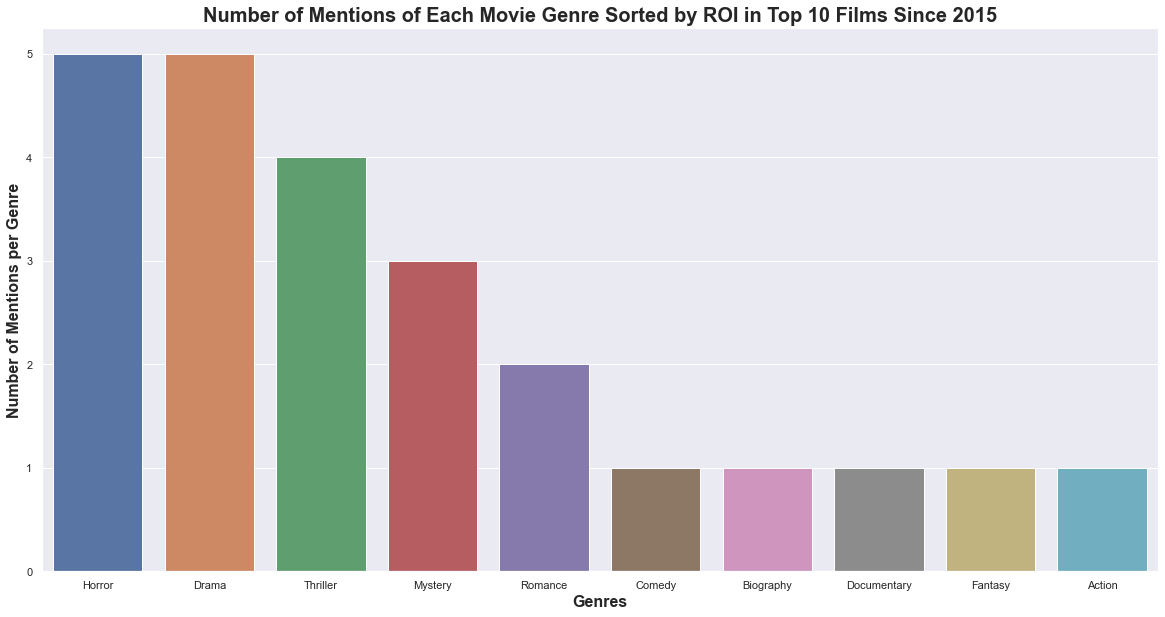

In [49]:
#visualizing genres in the top 10 films in our data set:
tn_imdb_merged_genre_top_10 = tn_imdb_merged_genre.head(24)
genres_top_10 = tn_imdb_merged_genre_top_10['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = genres_top_10.index, y = genres_top_10.values)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Top 10 Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_top_10.png");

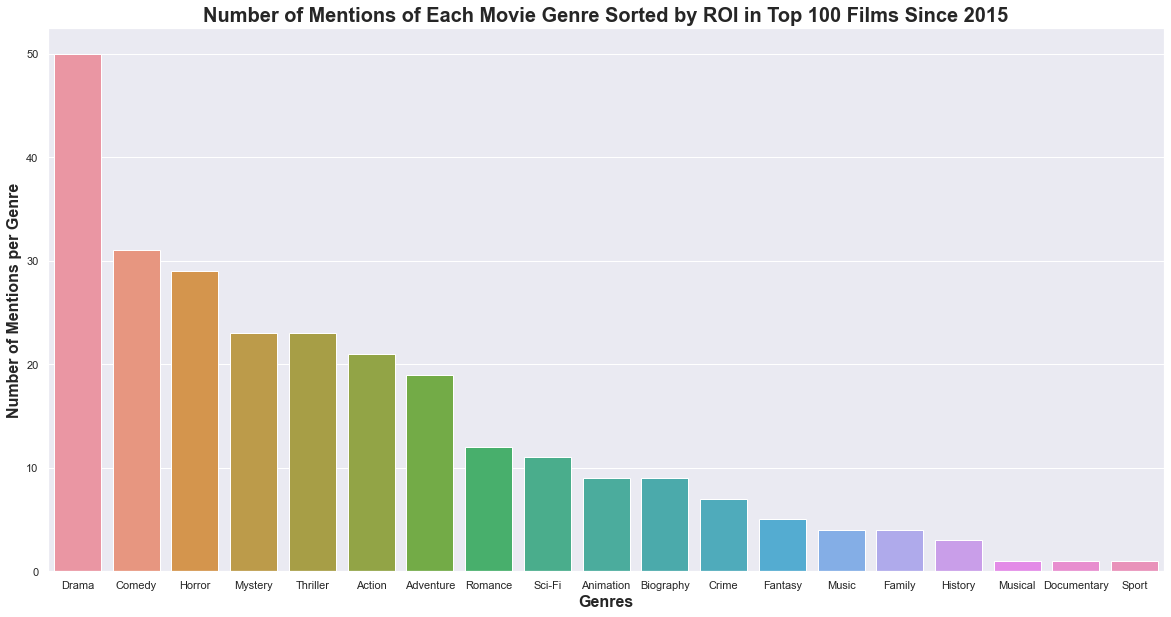

In [50]:
#visualizing genres in the top 100 films in our data set:
tn_imdb_merged_genre_top_100 = tn_imdb_merged_genre.head(264)
genres_top_100 = tn_imdb_merged_genre_top_100['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = genres_top_100.index, y = genres_top_100.values)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Top 100 Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_top_100.png");

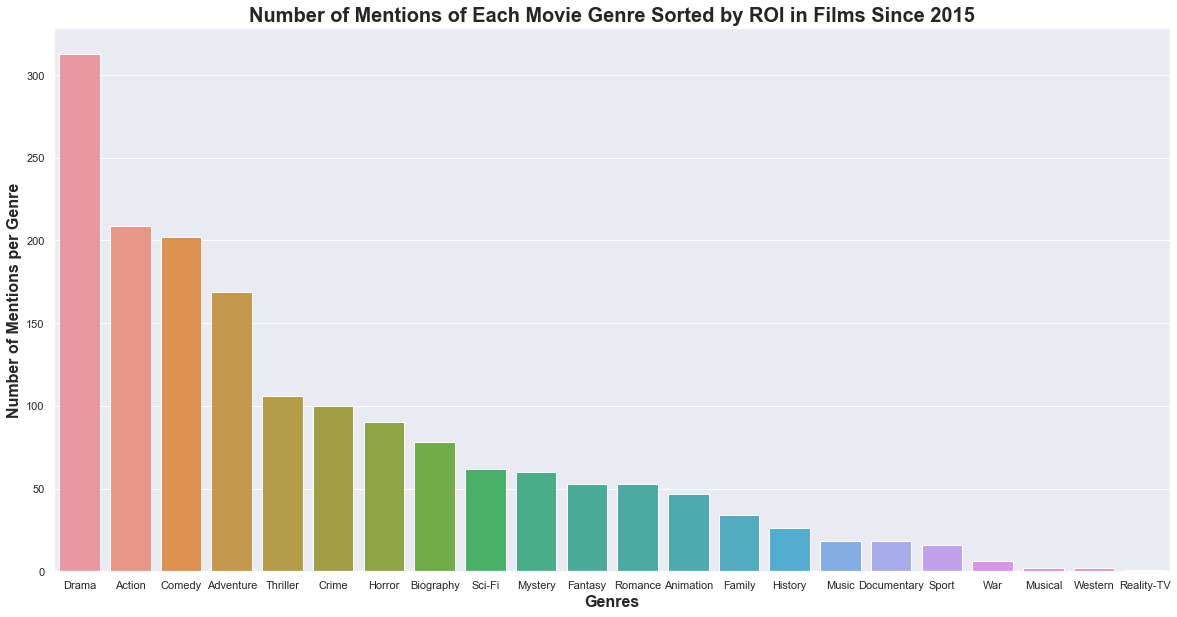

In [51]:
#visualizing genres in the full data set:
genres = tn_imdb_merged_genre['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
k = genres.index
v = genres.values
ax = sns.barplot(x = genres.index, y = genres.values)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_all.png");

From these visualizations above, it seems that "horror" is one of the more prominent genre labels for the top 10 films in our data set. This is likely because our data set is filtered by films with the highest ROI, and many horror films have a low production budget which could lead to a higher ROI if the movie has box office success.

As we expand our data set, we can see that "drama" becomes the most frequently used genre label. However, one question regarding this trend is how "drama" is defined when it comes to films. On some level, most films probably have some element that could be labeled as "dramatic," but this does not necessarily mean that the movie is "purely a drama."

As a final thought, it would be interesting to see how each of these genre labels is defined and how these labels were applied in each data set. The Donati quotation above is just one case study of how individual genre labels can be misleading, and I think this same logic could potentially be applied to each label in this data set. One direction for future analysis would be defining each of these genre labels more precisely and understanding the techniques used to apply these labels to each film so that our data could hopefully be more precise.